In [1]:
!pip install pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26771 sha256=8a50591fec0eae74b394175b37196b3aad26d34be950fcd1fbce3c52e4b666a2
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandasql import sqldf

In [3]:
# дослідимо дані

pd_orders = pd.read_csv('/content/orders.csv')
pd_orders.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [4]:
pd_orders_dets = pd.read_csv('/content/order_details.csv')
pd_orders_dets.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [5]:
pd_types = pd.read_csv('/content/pizza_types.csv', encoding='latin1')
pd_types.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [6]:
pd_pizzas = pd.read_csv('/content/pizzas.csv')
pd_pizzas.head()
#print(pd_types)

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [7]:
min_date = pd_orders['date'].min()
max_date = pd_orders['date'].max()
print(f'min = {min_date}, max = {max_date}')

min = 2015-01-01, max = 2015-12-31


##1) завдання

Структура бази даних:
orders має зв'язок one-to-many по order_id з order_details

order_details має зв'язок many-to-one по pizza_id з pizzas

pizzas має зв'язок many-to-one по pizza_type_id з pizzas_types


###Запит з завдання 6):

SELECT COUNT(DISTINCT order_id) / COUNT(DISTINCT DATE(date)) AS

avg_customers_per_day

FROM pd_orders;

###Запит з завдання 7):

SELECT AVG(total_pizzas)

FROM (

SELECT pd_orders.order_id, SUM(pd_orders_dets.quantity) AS total_pizzas

FROM pd_orders_dets

JOIN pd_orders ON pd_orders.order_id = pd_orders_dets.order_id

WHERE pd_orders.date BETWEEN '2015-09-01' AND '2015-11-30'

GROUP BY pd_orders.order_id

) AS subquery;
###Запит з завдання 8):
SELECT SUM(price * quantity) AS total_revenue

FROM pd_orders_dets o

JOIN pd_pizzas p ON o.pizza_id = p.pizza_id

JOIN (

SELECT pizza_id

FROM pd_orders_dets

GROUP BY pizza_id

ORDER BY COUNT(quantity) DESC

LIMIT 3

) popular_pizzas ON o.pizza_id = popular_pizzas.pizza_id

JOIN pd_orders ON pd_orders.order_id = o.order_id

WHERE pd_orders.date BETWEEN '2015-06-01' AND '2015-06-31';
###Запит з завдання 9):
SELECT c.category, p.size, SUM(o.quantity) AS total_ordered

FROM pd_orders_dets o

JOIN pd_pizzas p ON o.pizza_id = p.pizza_id

JOIN pd_types c ON p.pizza_type_id = c.pizza_type_id

GROUP BY c.category, p.size;

In [16]:
#2

# запис в таблицю ведеться по шляху до таблиці

last_row = pd_orders.iloc[-1]
print(*last_row)

new_data = {
    'order_id':[21351],
    'date':['2016-01-01'],
    'time':['21:02:05'],
}

new_pd = pd.DataFrame(new_data, index = [0])
new_pd.to_csv('our_new.csv', index = False)


# наша функція, яка здійснює запис в таблиці
def write_rep(new_file_path, goal_file_path):
  with open(new_file_path, 'r') as file:
    our_f_data = file.read()

  with open(goal_file_path, 'a') as file:
    file.write(our_f_data)

write_rep('/content/our_new.csv','/content/orders.csv')

pd_orders = pd.read_csv('/content/orders.csv')
last_row = pd_orders.iloc[-1]
print(*last_row)


21350 2015-12-31 23:02:05
21351 2016-01-01 21:02:05


##3) завдання


In [18]:
#3
new_data = pd_orders.copy()

new_data['time'] = pd.to_datetime(new_data['time'])

new_data['hour'] = new_data['time'].dt.hour
new_data.head()

hours_r = new_data.groupby('hour').size().reset_index(name='count')

<ipython-input-18-4f9ce7ec4534>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  new_data['time'] = pd.to_datetime(new_data['time'])


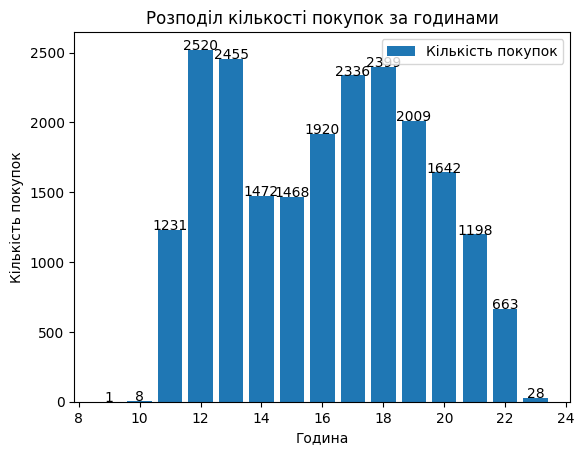

In [22]:
plt.bar(hours_r['hour'], hours_r['count'], label='Кількість покупок')

plt.legend()

for i, count in enumerate(hours_r['count']):
    plt.text(hours_r['hour'][i], count + 0.1, str(count), ha='center')

plt.xlabel('Година')
plt.ylabel('Кількість покупок')
plt.title('Розподіл кількості покупок за годинами')

plt.show()

Можемо побачити, що у заклада є 2 "локальних максимуми" - 12 година та 18.

##4) завдання


In [33]:
new_data = pd_orders.copy()

new_data['date'] = pd.to_datetime(new_data['date'])

new_data['month'] = new_data['date'].dt.month

print(new_data.head())

hours_m = new_data.groupby('month').size().reset_index(name='count')
print(hours_m['month'])

   order_id       date      time  month
0         1 2015-01-01  11:38:36      1
1         2 2015-01-01  11:57:40      1
2         3 2015-01-01  12:12:28      1
3         4 2015-01-01  12:16:31      1
4         5 2015-01-01  12:21:30      1
0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
Name: month, dtype: int32


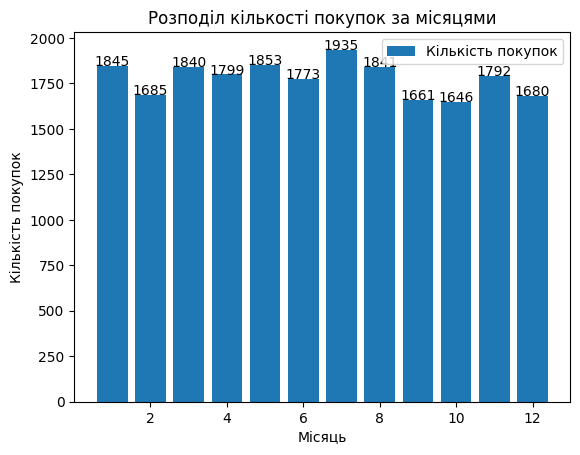

In [35]:
plt.bar(hours_m['month'], hours_m['count'], label='Кількість покупок')

plt.legend()

for i, count in enumerate(hours_m['count']):
    plt.text(hours_m['month'][i], count + 0.1, str(count), ha='center')

plt.xlabel('Місяць')
plt.ylabel('Кількість покупок')
plt.title('Розподіл кількості покупок за місяцями')

plt.show()

Пік приходиться на 7 місяць - липень. Але загалом можемо побачити, що немає такої вираженої залежності по сезонам,як по годинам.

##5) завдання


In [44]:
merged_df_1 = pd.merge(pd_orders_dets, pd_pizzas, on='pizza_id')
merged_df_1.head()
#print(pd_orders_dets.shape)
#print(merged_df_1.shape)
merged_df_2 = pd.merge(merged_df_1, pd_types, on='pizza_type_id')
merged_df_2.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,179,77,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
2,357,146,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
3,389,163,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
4,568,247,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"


In [52]:
order_counts = merged_df_2.groupby('pizza_id')['quantity'].sum().reset_index()
order_counts_sorted = order_counts.sort_values(by='quantity', ascending=False)
print(order_counts_sorted)

          pizza_id  quantity
3       big_meat_s      1914
80      thai_ckn_l      1410
20   five_cheese_l      1409
21   four_cheese_l      1316
18   classic_dlx_m      1181
..             ...       ...
43      mexicana_s       162
7      calabrese_s        99
13   ckn_alfredo_s        96
23  green_garden_l        95
87   the_greek_xxl        28

[91 rows x 2 columns]


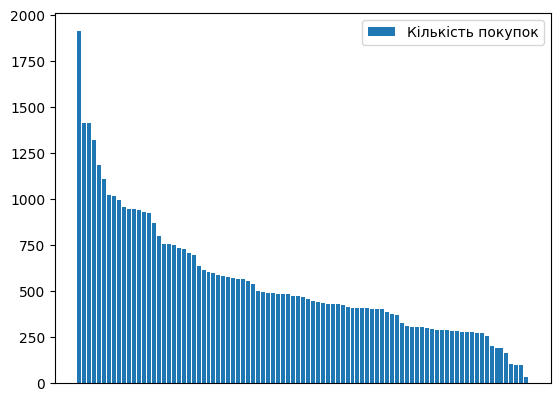

In [54]:
plt.bar(order_counts_sorted['pizza_id'], order_counts_sorted['quantity'], label='Кількість покупок')

plt.legend()

plt.xticks([])

plt.show()

In [62]:
last_vals = order_counts_sorted[-4:]
print(last_vals)

          pizza_id  quantity
7      calabrese_s        99
13   ckn_alfredo_s        96
23  green_garden_l        95
87   the_greek_xxl        28


In [79]:
for index, row in last_vals.iterrows():
  #print(f"Рядок {index}:")
  cur_val = row['pizza_id']
  cur_val_1 = merged_df_2[merged_df_2['pizza_id'] == cur_val]
  cur_val_2 = cur_val_1[['name', 'size']].iloc[0]

  print(f'name: {cur_val_2["name"]}, size: {cur_val_2["size"]}')


name: The Calabrese Pizza, size: S
name: The Chicken Alfredo Pizza, size: S
name: The Green Garden Pizza, size: L
name: The Greek Pizza, size: XXL


Отже, пропоную видалити останні 4 позиції з кінця, виведені згори

##6) завдання


In [25]:
pysqldf = lambda q: sqldf(q, globals())

In [27]:
query = """
    SELECT COUNT(DISTINCT order_id) / COUNT(DISTINCT DATE(date)) AS avg_customers_per_day
    FROM pd_orders;
"""

result = pysqldf(query)


print(result)

   avg_customers_per_day
0                     59


##7) завдання


In [52]:
query = """
    SELECT AVG(total_pizzas)
FROM (
    SELECT pd_orders.order_id, SUM(pd_orders_dets.quantity) AS total_pizzas
    FROM pd_orders_dets
    JOIN pd_orders ON pd_orders.order_id = pd_orders_dets.order_id
    WHERE pd_orders.date BETWEEN '2015-09-01' AND '2015-11-30'
    GROUP BY pd_orders.order_id
    ) AS subquery;
"""

result = pysqldf(query)


print(result)

   AVG(total_pizzas)
0           2.361051


##8) завдання


In [47]:
query = """
    SELECT SUM(price * quantity) AS total_revenue
    FROM pd_orders_dets o
    JOIN pd_pizzas p ON o.pizza_id = p.pizza_id
    JOIN (
    SELECT pizza_id
    FROM pd_orders_dets
    GROUP BY pizza_id
    ORDER BY COUNT(quantity) DESC
    LIMIT 3
    ) popular_pizzas ON o.pizza_id = popular_pizzas.pizza_id
    JOIN pd_orders ON pd_orders.order_id = o.order_id
    WHERE pd_orders.date BETWEEN '2015-06-01' AND '2015-06-31';

"""
#WHERE MONTH(order_date) = 6;
result = pysqldf(query)


print(result)

   total_revenue
0         6410.5


##9) завдання

In [39]:
query = """
    SELECT c.category, p.size, SUM(o.quantity) AS total_ordered
    FROM pd_orders_dets o
    JOIN pd_pizzas p ON o.pizza_id = p.pizza_id
    JOIN pd_types c ON p.pizza_type_id = c.pizza_type_id
    GROUP BY c.category, p.size;

"""
#WHERE MONTH(order_date) = 6;
result = pysqldf(query)


print(result)

   category size  total_ordered
0   Chicken    L           4932
1   Chicken    M           3894
2   Chicken    S           2224
3   Classic    L           4057
4   Classic    M           4112
5   Classic    S           6139
6   Classic   XL            552
7   Classic  XXL             28
8   Supreme    L           4564
9   Supreme    M           4046
10  Supreme    S           3377
11   Veggie    L           5403
12   Veggie    M           3583
13   Veggie    S           2663
